# Deep Learning básico
O objetivo desse projeto é explorar alguns conceitos básicos do modelo de Deep Learning. Usaremos a base de dados iris para esse trabalho.
## Criando o primeiro Perceptron

In [1]:
from tensorflow import keras

In [2]:
modelo = keras.Sequential([keras.layers.Dense(units=1,input_shape=[2],name='neuronio')])
modelo

In [3]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 neuronio (Dense)            (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


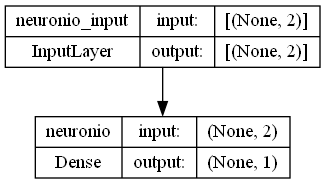

In [4]:
keras.utils.plot_model(modelo,show_shapes=True)

In [5]:
modelo.layers

In [6]:
modelo.layers[0].get_weights()

[array([[-1.3573992 ],
        [-0.41495663]], dtype=float32),
 array([0.], dtype=float32)]

In [7]:
pesos,bias = modelo.layers[0].get_weights()
print(pesos.shape)
pesos

(2, 1)


array([[-1.3573992 ],
       [-0.41495663]], dtype=float32)

In [8]:
print(bias.shape)
bias

(1,)


array([0.], dtype=float32)

In [9]:
modelo = keras.Sequential([keras.layers.Dense(units=1,input_shape=[2],name='neuronio',
                                              kernel_initializer = keras.initializers.RandomNormal(),
                                              bias_initializer = keras.initializers.Ones())])
modelo.layers[0].get_weights()

[array([[ 0.01796887],
        [-0.07078883]], dtype=float32),
 array([1.], dtype=float32)]

## Importando os dados

In [10]:
from sklearn import datasets

iris = datasets.load_iris(return_X_y = True)
x = iris[0]
y = iris[1]
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [11]:
datasets.load_iris()['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
datasets.load_iris()['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

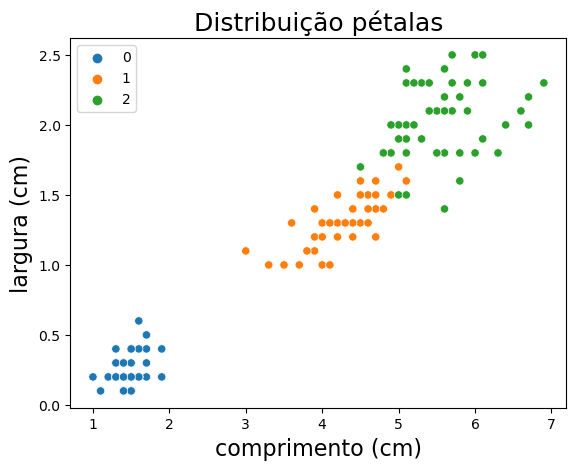

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=x[:,2],y=x[:,3],hue=y,palette='tab10')
plt.xlabel('comprimento (cm)',fontsize =16)
plt.ylabel('largura (cm)', fontsize=16)
plt.title('Distribuição pétalas', fontsize = 18)
plt.show()

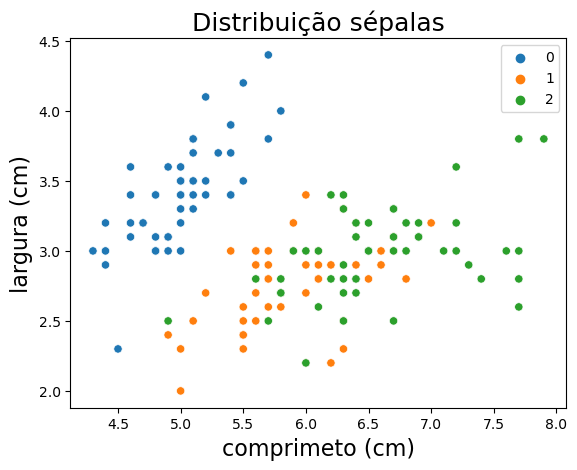

In [16]:
sns.scatterplot(x = x[:,0], y = x[:,1], hue = y, palette = "tab10")
plt.xlabel('comprimeto (cm)', fontsize = 16)
plt.ylabel('largura (cm)', fontsize = 16)
plt.title('Distribuição sépalas', fontsize = 18)
plt.show()

In [17]:
y.shape

(150,)

In [18]:
y = keras.utils.to_categorical(y)
y.shape

(150, 3)

In [19]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [21]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify = y, random_state=42)

In [22]:
x_treino.shape

(120, 4)

In [23]:
x_teste.shape

(30, 4)

## Modelo de rede neural

In [24]:
modelo = keras.Sequential([keras.layers.InputLayer(input_shape=[4,],name='entrada'),
                           keras.layers.Dense(512,activation='relu',name='oculta',
                                              kernel_initializer=keras.initializers.RandomNormal(seed=142)),
                           keras.layers.Dense(3,activation='softmax',name='saida')])
modelo

In [25]:
modelo.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 oculta (Dense)              (None, 512)               2560      
                                                                 
 saida (Dense)               (None, 3)                 1539      
                                                                 
Total params: 4,099
Trainable params: 4,099
Non-trainable params: 0
_________________________________________________________________


In [26]:
modelo.compile(loss = 'categorical_crossentropy',
               optimizer = 'rmsprop',
               metrics = ['categorical_accuracy'])

In [27]:
epocas=100
historico = modelo.fit(x_treino,y_treino,
           epochs=epocas,
           validation_split=0.3)

Epoch 1/100
3/3 [==============================] - 2s 122ms/step - loss: 1.0672 - categorical_accuracy: 0.6190 - val_loss: 1.0110 - val_categorical_accuracy: 0.6389
Epoch 2/100
3/3 [==============================] - 0s 37ms/step - loss: 0.9943 - categorical_accuracy: 0.6786 - val_loss: 0.9684 - val_categorical_accuracy: 0.6389
Epoch 3/100
3/3 [==============================] - 0s 23ms/step - loss: 0.9455 - categorical_accuracy: 0.6786 - val_loss: 0.9313 - val_categorical_accuracy: 0.6389
Epoch 4/100
3/3 [==============================] - 0s 26ms/step - loss: 0.9129 - categorical_accuracy: 0.6786 - val_loss: 0.8990 - val_categorical_accuracy: 0.6389
Epoch 5/100
3/3 [==============================] - 0s 31ms/step - loss: 0.8727 - categorical_accuracy: 0.6786 - val_loss: 0.8693 - val_categorical_accuracy: 0.6389
Epoch 6/100
3/3 [==============================] - 0s 27ms/step - loss: 0.8355 - categorical_accuracy: 0.6786 - val_loss: 0.8383 - val_categorical_accuracy: 0.6389
Epoch 7/100
3/3

In [28]:
historico.history

{'loss': [1.0672264099121094,
  0.9942814111709595,
  0.9454992413520813,
  0.9128535985946655,
  0.8727051019668579,
  0.8354660272598267,
  0.8015750050544739,
  0.7705978155136108,
  0.7397259473800659,
  0.7167474627494812,
  0.6902663707733154,
  0.662516176700592,
  0.6415916681289673,
  0.6227496862411499,
  0.5990251898765564,
  0.5793894529342651,
  0.5647442936897278,
  0.5467315912246704,
  0.5301095843315125,
  0.5172352194786072,
  0.5039048194885254,
  0.49061331152915955,
  0.47809478640556335,
  0.4673670828342438,
  0.4549654424190521,
  0.4459429383277893,
  0.435752272605896,
  0.4252335727214813,
  0.415374755859375,
  0.4059707224369049,
  0.40217122435569763,
  0.3894772231578827,
  0.39022326469421387,
  0.37381353974342346,
  0.36696115136146545,
  0.36368274688720703,
  0.35246071219444275,
  0.3460347056388855,
  0.3502611219882965,
  0.33247286081314087,
  0.32805556058883667,
  0.32353174686431885,
  0.31693196296691895,
  0.3093181252479553,
  0.31291437149

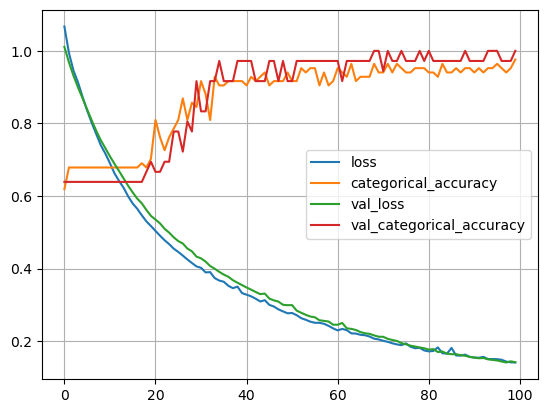

In [29]:
import pandas as pd

pd.DataFrame(historico.history).plot()
plt.grid()
plt.show()

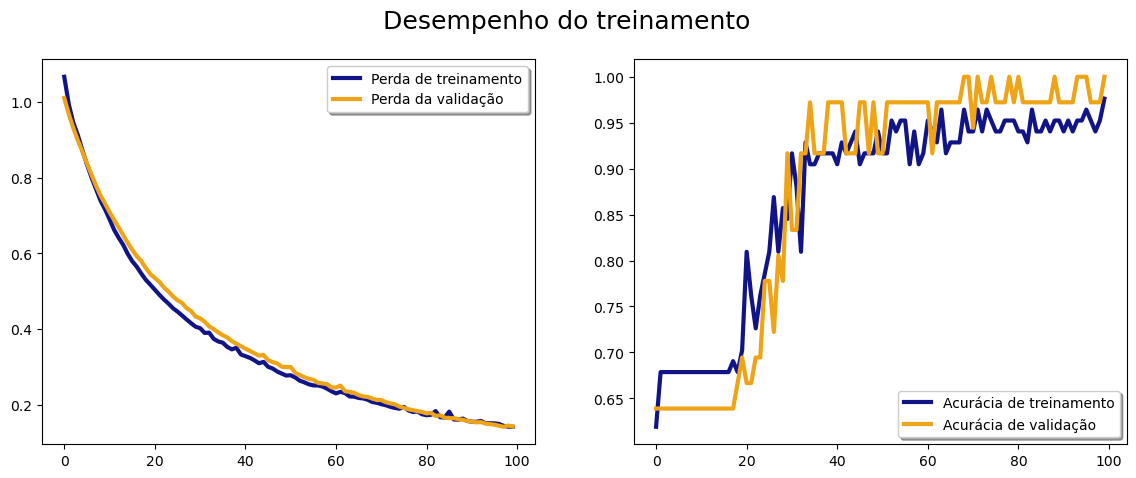

In [30]:
fig, ax = plt.subplots(1,2, figsize=(14,5))
ax[0].plot(historico.history['loss'], color='#111487', linewidth=3, label="Perda de treinamento")
ax[0].plot(historico.history['val_loss'], color='#EFA316', linewidth=3, label="Perda da validação",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(historico.history['categorical_accuracy'], color='#111487', linewidth=3, label="Acurácia de treinamento")
ax[1].plot(historico.history['val_categorical_accuracy'], color='#EFA316', linewidth=3, label="Acurácia de validação")
legend = ax[1].legend(loc='best', shadow=True)

plt.suptitle('Desempenho do treinamento', fontsize = 18)
plt.show()

In [31]:
modelo.evaluate(x_teste,y_teste)

1/1 [==============================] - 0s 43ms/step - loss: 0.1586 - categorical_accuracy: 0.9667


[0.15860314667224884, 0.9666666388511658]

In [32]:
modelo.predict([[0.61, 0.5, 0.69, 0.79]])

1/1 [==============================] - 0s 210ms/step


array([[3.4220910e-05, 1.5713972e-01, 8.4282607e-01]], dtype=float32)